In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

### Multiple Layer Perceptron

Hand written digits recognition using deep learning

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [4]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape,sep='\n')

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
x_train[0].shape

(28, 28)

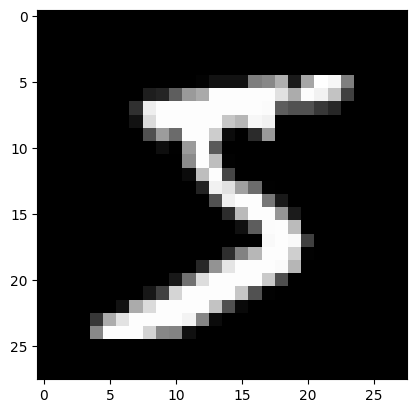

In [6]:
plt.imshow(x_train[0],cmap='gray')
plt.show()

In [7]:
y_train[0]

5

In [8]:
len(x_train)

60000

In [9]:
## represents no.of images in the training data set
print(x_train[0].shape,type(x_train[0].shape),sep='\n')

(28, 28)
<class 'tuple'>


In [10]:
x_train_flatten=x_train.reshape(len(x_train),28*28)
x_test_flatten=x_test.reshape(len(x_test),28*28)

In [11]:
print(x_train_flatten.shape,x_test_flatten.shape,sep='\n')

(60000, 784)
(10000, 784)


training the model without data scaling for optimiser as adam


In [56]:
model = keras.Sequential([ 
    keras.layers.Dense(80,input_shape=(784,),activation='relu',name='Hidden_Layer1'),
    keras.layers.Dense(50,activation='relu',name='Hidden_Layer2'),
	keras.layers.Dense(10, activation='sigmoid',name='Ouput_Layer') 
])
tb_callback=tf.keras.callbacks.TensorBoard(log_dir='logs/adam',histogram_freq=1) 
model.compile( 
	optimizer='adam', 
	loss='sparse_categorical_crossentropy', 
	metrics=['accuracy']) 

model.fit(x_train_flatten, y_train, epochs=5,callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2715 - accuracy: 0.9210
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1195 - accuracy: 0.9650
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0847 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0646 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0548 - accuracy: 0.9827


In [31]:
y_pred=model.predict(x_test_flatten)

313/313 [==============================] - 0s 829us/step


In [57]:
model.evaluate(x_test_flatten, y_test) 

313/313 [==============================] - 0s 947us/step - loss: 0.0887 - accuracy: 0.9737


[0.08865911513566971, 0.9736999869346619]

In [37]:
y_test[0]

7

In [34]:
y_pred[0]

array([1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       9.9999940e-01, 1.0000000e+00, 2.1504557e-04, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00], dtype=float32)

In [35]:
y_pred_val=np.argmax(y_pred,axis=1)

In [36]:
y_pred_val[0]

0

In [38]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_val)
print(cm)

[[ 964    0    0    2    2    0    4    2    6    0]
 [  13 1105    4    3    1    1    1    0    7    0]
 [  16  493  459   10   18    2    4    8   21    1]
 [   1   97   19  850    0    9    1    4   24    5]
 [   1    1    3    0  934    0   10    4    8   21]
 [ 112   33   46   90    4  572   13    0   19    3]
 [   4    0    0    1   12   10  919    0   12    0]
 [ 472  140   79   77   33    5    1  206    3   12]
 [   9   13   31   24    9   18    8    5  849    8]
 [   4    7    0   85  389    8    1   13   16  486]]


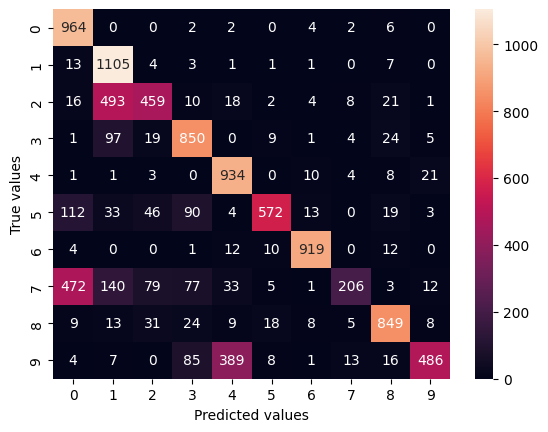

In [39]:
sns.heatmap(cm,annot=True,fmt='.0f')
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.show()

training the model with data scaling (for optimser adam)

In [40]:
x_train_flatten=x_train_flatten/255
x_test_flatten=x_test_flatten/255

In [50]:
model.fit(x_train_flatten, y_train, epochs=5,callbacks=[tb_callback]) 

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0600 - accuracy: 0.9811
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0504 - accuracy: 0.9836
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0442 - accuracy: 0.9856
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0374 - accuracy: 0.9880
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0333 - accuracy: 0.9890


In [52]:
y_pred1=model.predict(x_test_flatten)

313/313 [==============================] - 0s 837us/step


In [53]:
y_pred1_val=np.argmax(y_pred1,axis=1)

In [51]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 0s 931us/step - loss: 0.0970 - accuracy: 0.9741


[0.09702116996049881, 0.9740999937057495]

In [54]:
cm=confusion_matrix(y_test,y_pred1_val)

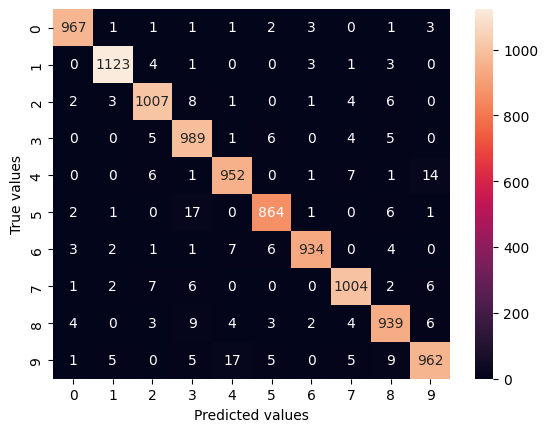

In [55]:
sns.heatmap(cm,annot=True,fmt='.0f')
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.show()

For optimiser stochastic gradient descent(data scaling performed)

In [58]:
model1 = keras.Sequential([ 
    keras.layers.Dense(80,input_shape=(784,),activation='relu',name='Hidden_Layer1'),
    keras.layers.Dense(50,activation='relu',name='Hidden_Layer2'),
	keras.layers.Dense(10, activation='sigmoid',name='Ouput_Layer') 
])
tb1_callback=tf.keras.callbacks.TensorBoard(log_dir='logs/SGD',histogram_freq=1) 
model1.compile( 
	optimizer='SGD', 
	loss='sparse_categorical_crossentropy', 
	metrics=['accuracy']) 

model1.fit(x_train_flatten, y_train, epochs=5,callbacks=[tb1_callback])

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6423 - accuracy: 0.8242
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3025 - accuracy: 0.9115
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2545 - accuracy: 0.9263
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2238 - accuracy: 0.9356
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2008 - accuracy: 0.9422


In [59]:
model1.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1876 - accuracy: 0.9483


[0.1876477599143982, 0.9483000040054321]